In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from __future__ import print_function

model = Sequential()

# The first layer of CNN
model.add(Conv2D(250, (3, 3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# The Second layer of CNN
model.add(Conv2D(200, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# The Third layer of CNN
model.add(Conv2D(150, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# The Fourth layer of CNN
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# The Fifth layer of CNN
model.add(Conv2D(75,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattern the layer
model.add(Flatten())
model.add(Dropout(0.5))
# Dense layer of 64 neurons
model.add(Dense(50, activation='relu'))
# Final layer of 2 categories
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:02d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data, train_target, epochs=5, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/5
31/31 [==============================] - 342s 11s/step - loss: 0.6949 - accuracy: 0.5051 - val_loss: 0.6772 - val_accuracy: 0.5282
Epoch 2/5
31/31 [==============================] - 343s 11s/step - loss: 0.6627 - accuracy: 0.6061 - val_loss: 0.5852 - val_accuracy: 0.6895
Epoch 3/5
31/31 [==============================] - 351s 11s/step - loss: 0.4977 - accuracy: 0.7778 - val_loss: 0.3812 - val_accuracy: 0.8226
Epoch 4/5
31/31 [==============================] - 355s 11s/step - loss: 0.3005 - accuracy: 0.8828 - val_loss: 0.2270 - val_accuracy: 0.9194
Epoch 5/5
31/31 [==============================] - 359s 12s/step - loss: 0.2471 - accuracy: 0.9030 - val_loss: 0.2079 - val_accuracy: 0.9234


In [20]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 126, 126, 250)     2500      
_________________________________________________________________
activation_11 (Activation)   (None, 126, 126, 250)     0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 250)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 61, 61, 200)       450200    
_________________________________________________________________
activation_12 (Activation)   (None, 61, 61, 200)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 200)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 150)      

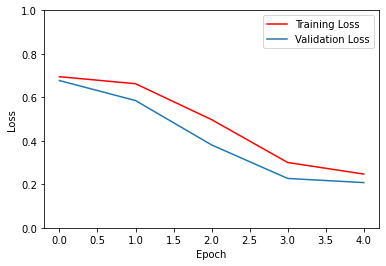

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0,1))
plt.legend()
plt.show()

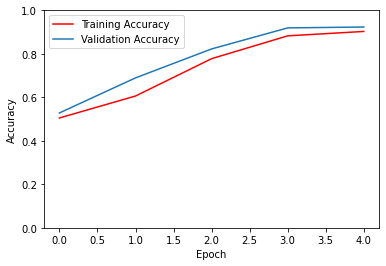

In [22]:
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0,1))
plt.legend()
plt.show()